##### Версия 0.1 -- Январь 2018

# Подъемная сила цилиндра

Помните, мы моделировали обтекание [диполя](03_Lesson03_doublet.ipynb)? И у нас получилась картина линий тока, как при обтекании цилиндра. Проанализировав распределение коэффициента давления, мы увидели, что сопротивление цилиндра равно нулю, что привело нас к _парадоксу д'Аламбера_.

_А что с подъемной силой?_ Действует ли она на цилиндр круглого сечения?
А если такой цилиндр вращается? Вы слышали об эффекте Магнуса?

Возможно вы удивитесь, узнав, что нам всего навсего нужно добавить [вихрь](04_Lesson04_vortex.ipynb) в центр цилиндра. Давайте посмотрим, как это выглядит.

Для начала вспомним уравнения для течения с диполем. В декартовых координатах, диполь, расположенный в начале координат имеет следующие функцию тока и компоненты скорости

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$


$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$

$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$

## Приступим к расчетам!

Поместим диполь интенсивностью $\kappa=1$ в начало координат и добавим набегающий поток со скоростью $U_\infty=1$ (да, единицы это круто). Можно повторно использовать код, написанный нами ранее — это удачная мысль.

In [1]:
import math
import numpy
from matplotlib import pyplot
# помещаем графику внутрь блокнота
%matplotlib inline

In [2]:
N = 50                                # Число точек в каждом направлении
x_start, x_end = -2.0, 2.0            # граница по x
y_start, y_end = -1.0, 1.0            # граница по y
x = numpy.linspace(x_start, x_end, N)    # вычисляем одномерный массив x
y = numpy.linspace(y_start, y_end, N)    # вычисляем одномерный массив y
X, Y = numpy.meshgrid(x, y)              # создаем расчетную сетку

In [3]:
kappa = 1.0                           # интенсивность диполя
x_doublet, y_doublet = 0.0, 0.0       # положение диполя

u_inf = 1.0                           # скорость набегающего потока

Вот, как мы определяли функций для диполя:

In [4]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

А теперь добавим набегающий поток к диполю и вычислим все, что нужно, чтобы получить обтекание цилиндра:

In [5]:
# рассчитываем поле скоростей в узлах расчетной сетки
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet,\
                                            X, Y)

# рассчитываем функцию тока в узлах расчетной сетки
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet,\
                                          X, Y)

# компоненты скорости бесконечеого потока
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# функция тока равномерного течения
psi_freestream = u_inf * Y

# суперпозиция диполя и равномерного потока
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

Теперь все готово для визуализации течения.

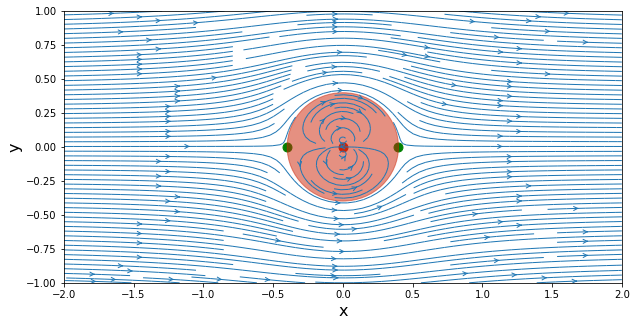

In [6]:
# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# вычисляем радиус цилиндра и рисуем окружность с такми раидусом
R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

# вычисляем положение точек торможения и добавляем их на рисунок
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf)), 0
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g',\
               s=80, marker='o');

Прекрасно! Теперь у нас есть течение вокруг цилиндра.

Теперь добавим вихрь с положительной интенсивностью $\Gamma$, расположенный в начале координат. В декартовых координатах функция тока и компоненты скорости задаются:

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)$$

$$u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2} \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$

Исходя из этих уравнений определим функции `get_velocity_vortex()` и `get_stream_function_vortex()`, которые ... ну понятно из их названий, что они делают. Вообще, это хорошая идея — давать имена переменным, классам и функциям так, чтобы  было понятно, для чего они нужны. Самодокументируемый код. Поэкспериментируйте со значением $\ \Gamma$ и перестойте картину течения. Посмотрите, что происходит.

In [7]:
gamma = 4.0                      # интенсивность вихря
x_vortex, y_vortex = 0.0, 0.0    # положение вихря

In [8]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [9]:
# рассчитываем поле скоростей в узлах расчетной сетки
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# рассчитываем функцию тока в узлах расчетной сетки
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

Теперь, когда у нас есть все необходимые ингредиенты (равномерный поток, диполь и вихрь), мы применим принцип суперпозиции, а затем сделаем красивую картинку.

In [24]:
# суперпозиция диполя, вихря и набегающего потока
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

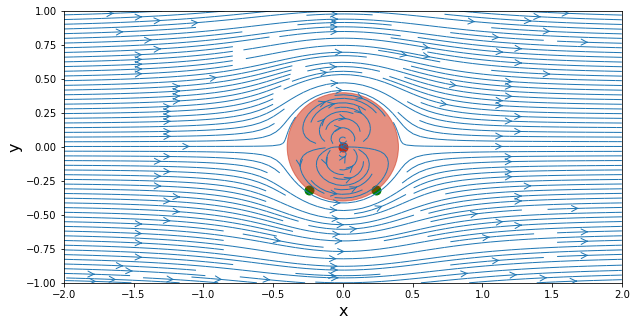

In [10]:
# вычисляем радиус цилиндра
R = math.sqrt(kappa/(2*math.pi*u_inf))

# определяем координаты точек торможения
x_stagn1, y_stagn1 = +math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2),\
-gamma/(4*math.pi*u_inf)
x_stagn2, y_stagn2 = -math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2),\
-gamma/(4*math.pi*u_inf)

# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1.5,\
                  arrowstyle='->')
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g',\
               s=80, marker='o');

##### Контрольная задача

В блокноте третьего занятия, посвященного [диполю](03_Lesson03_doublet.ipynb), вам нужно было вычислить радиус цилиндра, создаваемого диполем в равномерном потоке. У вас должно было получиться

$$R = \sqrt{\frac{\kappa}{2\pi U_\infty}}$$

Новое задание — определите, где на поверхности цилиндра находятся точки торможения потока при наличии вихря.

Что произойдет, если $\ \frac{\Gamma}{4\pi U_\infty R} >1$?

Вернитесь назад и поэкспериментируйте со значениями $\Gamma$, при которых реализуется такой случай.

---

## Коэффициент давления

Давайте получим коэффициент давления на поверхности цилиндра и сравним со случаем, когда не было вихря.
Компоненты скорости в полярных координатах для комбинации набегающий поток + диполь + вихрь:

$$u_r\left(r,\theta\right) = U_\infty \cos\theta \left(1-\frac{R^2}{r^2}\right)$$

$$u_\theta\left(r,\theta\right) = -U_\infty \sin\theta \left(1+\frac{R^2}{r^2}\right) - \frac{\Gamma}{2\pi r}$$

где $R$ — радиус цилиндра.

Видно, что радиальная компонента на поверхности цилиндра исчезает, тогда как азимутальная скорость равна

$$u_\theta\left(R,\theta\right) = -2U_\infty \sin\theta - \frac{\Gamma}{2\pi R} .$$

Заметим, что без вихря азимутальная скорость на поверхности цилиндра получается

$$u_\theta\left(R,\theta\right) = -2U_\infty \sin\theta .$$

Из блокнота про диполь мы знаем, что коэффициент давления определяется как

$$C_p = 1-\frac{U^2}{U_\infty^2}$$

где $U^2 = u^2+v^2 = u_r^2+u_\theta^2$.

Давайте изобразим это на графике!

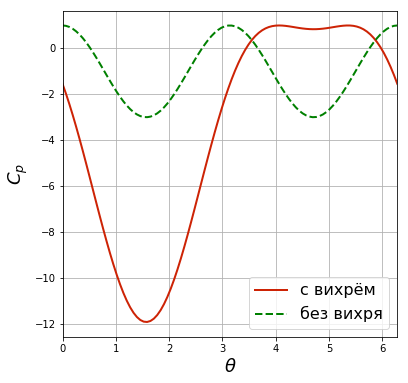

In [11]:
# вычисляем касательные компоненты скорости на поверхности цилиндра
theta = numpy.linspace(0, 2*math.pi, 100)
u_theta = -2*u_inf*numpy.sin(theta) - gamma/(2*math.pi*R)

# вычисляем коэффициент давления на поверхности цилиндра
cp = 1.0 - (u_theta/u_inf)**2

# без вихря
u_theta_no_vortex = -2*u_inf*numpy.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex/u_inf)**2

# рисуем распределение коэффициента давления
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, cp, label='с вихрём', color='#CD2305',\
            linewidth=2, linestyle='-')
pyplot.plot(theta, cp_no_vortex, label='без вихря', color='g',\
            linewidth=2, linestyle='--')
pyplot.legend(loc='best', prop={'size':16});

## Подъемная сила и сопротивление

Подъемная сила это компонента силы, действующей на тело со стороны потока, перпендикулярная скорости $U_\infty$, а сопротивление — компонента, параллельная скорости.  Как вычислить их, исходя из полученных данных?

Сила, действующая на цилиндр — интеграл давления, действующего на его поверхность (должна быть еще вязкость, но ее нет, так как мы рассматриваем идеальную жидкость). Если нарисовать диаграмму сил, то вы увидите, что

$$D = -\int_0^{2\pi} p \ \cos\theta \ R \ d\theta$$

$$L = -\int_0^{2\pi} p \ \sin\theta \ R \ d\theta$$


##### Контрольная задача

Используя уравнение Бернулли, замените $p$ в уравнениях выше, чтобы получить подъемную силу и сопротивление.

Что это значит?

## Эффект Магнуса

Возникновение силы при обтекании вращающегося цилиндра (а также сферы, или любого другого объекта) известно как _эффект Магнуса_.

Хотите верьте, хотите нет, но на основе этого эффекта предпринимались попытка создания самолетов с вращающимся цилиндром вместо крыла. Согласно статье в [PilotFriend](http://www.pilotfriend.com/photo_albums/potty/2.htm), в 1930 был создан летательный аппарат 921-V, который"взлетел как минимум один раз".

In [27]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/7/78/Flettner_Rotor_Aircraft.jpg')

Да и сейчас любители радиоуправляемых моделей собирают просмотры на Ютубе, развлекаясь с моделями "rotorwings" на основе эффекта Магнуса.

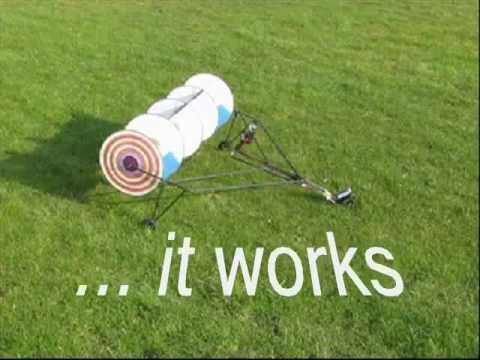

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo('POHre1P_E1k')

---

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()